In [1]:
using Plots
using DataFrames
using Statistics
using CSV

In [30]:
data = CSV.read("results.csv")

,size,vector_ns,matrix_ns
,Int64⍰,Int64⍰,Int64⍰
1,10,483,1026
2,10,206,540
3,10,157,544
4,10,162,500
5,10,149,508
6,10,153,542
7,10,158,532
8,10,148,506
9,10,161,545


In [31]:
data_processed = by(data, :size, df->DataFrame(vector_avg=mean(df[:vector_ns]), vector_std=std(df[:vector_ns]),
    matrix_avg=mean(df[:matrix_ns]), matrix_std=std(df[:matrix_ns])))

,size,vector_avg,vector_std,matrix_avg,matrix_std
,Int64⍰,Float64,Float64,Float64,Float64
1,10,194.1,102.829,574.3,159.833
2,11,169.4,11.6924,606.6,80.0752
3,12,176.8,14.8384,710.1,120.424
4,13,174.8,3.15524,761.3,86.4511
5,14,190.4,14.8114,862.4,93.9553
6,15,187.8,4.18463,959.9,68.0612
7,16,194.1,5.60654,1083.2,105.314
8,17,198.1,4.62961,1182.9,76.9451
9,18,209.4,14.3465,1318.3,77.8832


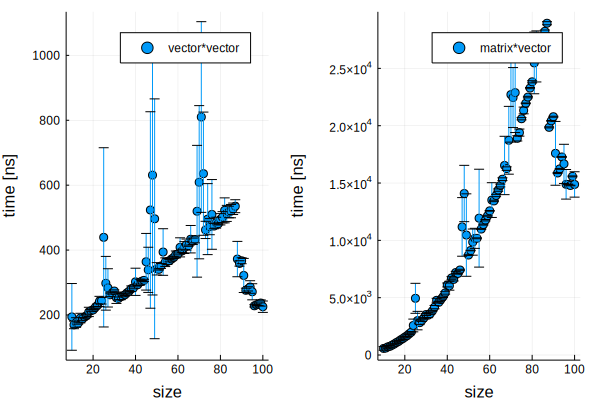

In [32]:
scatter(data_processed[:size], [data_processed[:vector_avg], data_processed[:matrix_avg]],
    yerr=[data_processed[:vector_std] data_processed[:matrix_std]], layout=2,
    xlabel="size", ylabel="time [ns]", labels=["vector*vector" "matrix*vector"])